In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam
from keras.regularizers import l2
from keras.utils import np_utils
%matplotlib inline

In [2]:
train_ds = tf.data.Dataset.load('D:\RandomGits\Facial-Expression-Recognition\datasets\\augmented_train_ds')
validation_ds = tf.data.Dataset.load('D:\RandomGits\Facial-Expression-Recognition\datasets\\augmented_validation_ds')

In [3]:
# train_ds = train_ds.batch(64)
# validation_ds = validation_ds.batch(64)
img, label = next(train_ds.as_numpy_iterator())

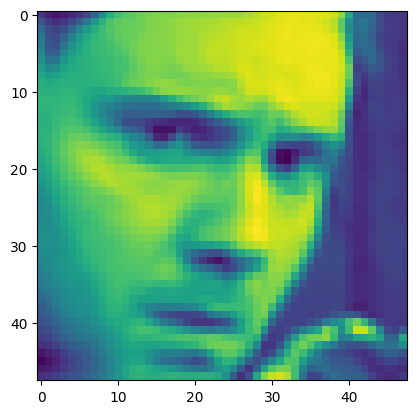

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [4]:
plt.imshow(img[0])
plt.show()
print(label)
print(img)

In [5]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(128,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       2

In [6]:
#Compliling the model
# model.compile(loss=categorical_crossentropy,
#               optimizer=Adam(),
#               metrics=['accuracy'])

#Training the model
# train_ds = train_ds.shuffle(1000, reshuffle_each_iteration=True)
history = model.fit(train_ds,
          batch_size=64,
          epochs=15,
          verbose=1,
          validation_data=(validation_ds),
          shuffle=True)


Epoch 1/15
1118/1118 [==============================] - 78s 65ms/step - loss: 1.7755 - accuracy: 0.3269 - val_loss: 1.6111 - val_accuracy: 0.3706
Epoch 2/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.5447 - accuracy: 0.4192 - val_loss: 1.5155 - val_accuracy: 0.4146
Epoch 3/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.4112 - accuracy: 0.4695 - val_loss: 1.4355 - val_accuracy: 0.4485
Epoch 4/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.2997 - accuracy: 0.5140 - val_loss: 1.3418 - val_accuracy: 0.4919
Epoch 5/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.2233 - accuracy: 0.5450 - val_loss: 1.2380 - val_accuracy: 0.5259
Epoch 6/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.1664 - accuracy: 0.5668 - val_loss: 1.2258 - val_accuracy: 0.5336
Epoch 7/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.1186 - accuracy: 0.5853 - val_loss: 1.1890 -

In [12]:
loss = model.evaluate(validation_ds)
print('Test loss:', loss)

114/114 [==============================] - 2s 18ms/step - loss: 1.1684 - accuracy: 0.5803
Test loss: [1.1684006452560425, 0.5802944898605347]


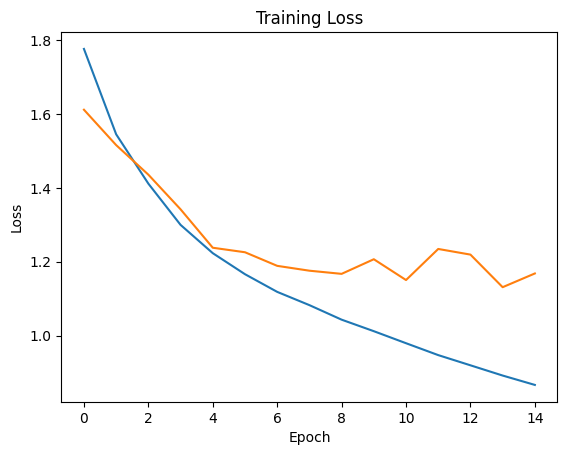

In [13]:
# plot the training loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")